# Introduction to Curve Fitting an Archimedean Spiral

Curve fitting is the process of finding a mathematical function that best describes a set of data points. In many cases, the data points form a curve, and the goal is to find a function that can generate that curve. One type of curve that can be fit using a mathematical function is the Archimedean spiral.

An Archimedean spiral is a spiral that expands outward as it revolves around a central point. It is described mathematically by the equation r = a + bθ, where r is the distance from the center of the spiral, a and b are constants, and θ is the angle of rotation. This type of spiral can be found in many natural and man-made objects, such as seashells, springs, and galaxies.

To fit an Archimedean spiral to a set of data points, we need to find values for the constants a and b that produce a curve that closely matches the data. This can be done using a variety of techniques, including least squares regression and nonlinear optimization. Once we have a function that accurately describes the data, we can use it to make predictions about future data points or to better understand the underlying process that generated the data.

Overall, curve fitting an Archimedean spiral is a useful tool for analyzing and modeling data that exhibits a spiral pattern. By accurately capturing the shape of the spiral, we can gain insights into the underlying mechanisms that drive the phenomenon and make more accurate predictions about future trends.

The algorithm in this repo has been derived from the following blog entry : [The spiral of splatter](https://blogs.sas.com/content/iml/2015/06/11/spiral-of-splatter.html)

# Basic function

When gathering data from a archimedean spiral the center is of the spiral is usually not at (0/0). To fit a curve we actually search for a, b, x0, y0

To construct a "spiral of best fit," you can do the following:

1. Choose a coordinate system and find the (x,y) coordinates of points along the spiral curve.
2. Create an objective function whose minimum will produce parameters for the spiral that best fits the data. This problem has four parameters: The center of the spiral (x0, y0) and the two parameters a and b the amplitude and decay rate for the archimedean spiral.
3. Fit the curve to the data and see if the model suits your needs. 

Let's create a spiral with some parameters


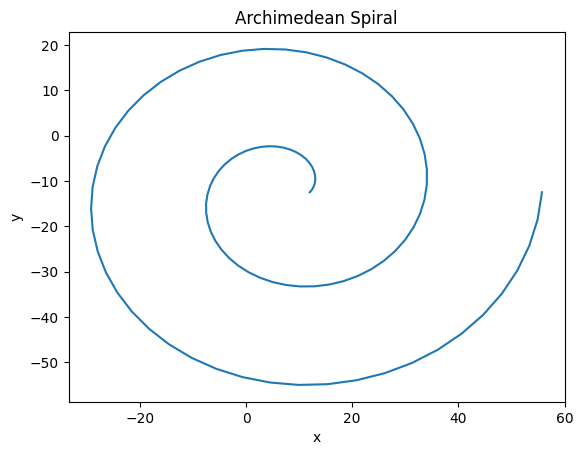

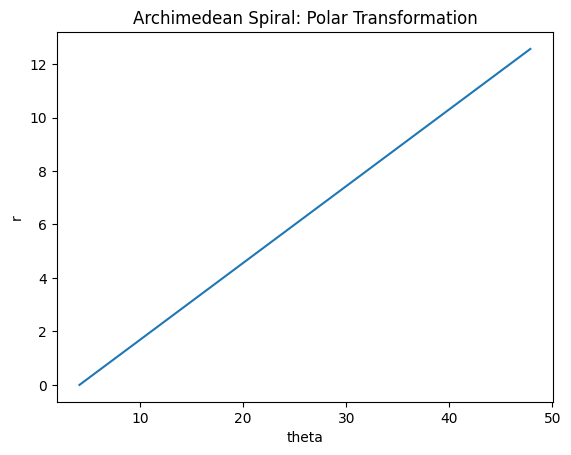

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scp

# Spiral values
a = 4.125
b = 3.48
x0 = 7.9
y0 = -12.5

# Create some points
thetadat = np.linspace(0,4*np.pi,100)
rdat = a + b*thetadat
xdat = rdat*np.cos(thetadat)+x0
ydat = rdat*np.sin(thetadat)+y0

# Plot the spiral in x,y space
plt.plot(xdat, ydat)
plt.title('Archimedean Spiral')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the spiral in r,theta space
plt.plot(rdat,thetadat)
plt.title('Archimedean Spiral: Polar Transformation')
plt.xlabel('theta')
plt.ylabel('r')
plt.show()

# Initial guess

The algorithm works best with a good initial guess. For x0i and y0i we take the mean values of the given x,y coordinates.
With the estimated center we perform a polar transformation of the given points.

An ideal center would give a linear line however the mean center is slithly shifted, which results in oscillations along the line.

Anyway we perform a polynomial fit for a linear equation to receive initial parameters for ai and bi.

[5.825993823974571, 3.2255909893037855, 8.159904848689852, -15.940573003372554]


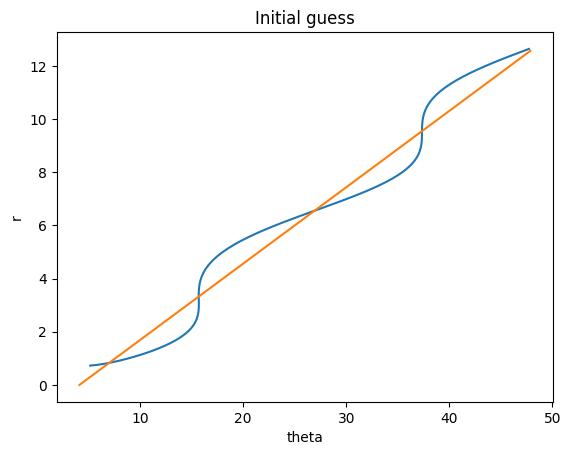

In [16]:
# Initial guess
x0i = np.mean(xdat)
y0i = np.mean(ydat)

xci = xdat-x0i
yci = ydat-y0i
theta2pii = np.arctan2(yci,xci)
thetai = np.unwrap(theta2pii,period=2*np.pi)
ri = np.sqrt(xci**2+yci**2)

# linearized LSQ fit for r = a + b * theta
# r = a + b * theta
p = np.polyfit(thetai, ri, 1)
ai = p[1]
bi = p[0]

# Print values
ini0 = [ai,bi,x0i,y0i]
print(ini0)

# Plot the spiral in x,y space
plt.plot(ri,thetai)
plt.plot(rdat,thetadat)
plt.title('Initial guess')
plt.xlabel('theta')
plt.ylabel('r')
plt.show()

# Optimize function

Now we need a function to be optimized by the trust region method. The function returns the sum of squared distances between the data points and the Archimedean spiral this is an indication of how good the fit is.

Then we run an optimisation using the trust region method.

In [17]:
from scipy import optimize
def Objf(p):
    """
    Computes the sum of squared distances between a set of data points and an Archimedean spiral, 
    parameterized by its center (x0,y0), radius at center (a), and rate of increase in radius (b).
    
    Args:
        p (list or array-like): A list or array-like object containing the values of the parameters 
                                to be optimized, in the order (a, b, x0, y0).
    
    Returns:
        float: The sum of squared distances between the data points and the Archimedean spiral.
    """

    # Gather data
    a,b,x0,y0 = p
    global xdat, ydat

    # Recenter data points
    xc = xdat-x0
    yc = ydat-y0

    # Get increasing sequence of polar angles
    theta2pi = np.arctan2(yc,xc)
    theta = np.unwrap(theta2pi,period=2*np.pi)

    # Calculate resulting points
    x = (a+b*theta)*np.cos(theta)
    y = (a+b*theta)*np.sin(theta)

    # Calculate the squared distances
    d2 = (xc-x)**2+(yc-y)**2

    # Return the sum of squared distances
    return(np.sum(d2))


# Optimize function
res = optimize.minimize(Objf,ini0,method='trust-constr',options={'gtol': 1e-10, 'disp': True})

# Print result
print(res.x)
print(res.message)

`xtol` termination condition is satisfied.
Number of iterations: 26, function evaluations: 130, CG iterations: 66, optimality: 4.81e-07, constraint violation: 0.00e+00, execution time: 0.034 s.
[  4.12500055   3.47999991   7.89999989 -12.50000006]
`xtol` termination condition is satisfied.
